In [14]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
#load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 114s 1us/step


In [5]:
#checking dataset shape
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

Feature matrix (x_train): (50000, 32, 32, 3)
Target matrix (y_train): (50000, 1)
Feature matrix (x_test): (10000, 32, 32, 3)
Target matrix (y_test): (10000, 1)


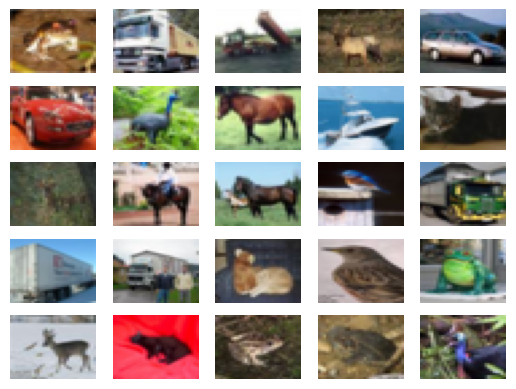

In [6]:
#load first 25 images
fig, ax = plt.subplots(5, 5)

k = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        ax[i][j].set_axis_off()
        k += 1

plt.show()

In [12]:
#normalizing input
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
#Creating a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
#train the model
history = model.fit(x_train, y_train, epochs=30,
          batch_size=64,
          validation_split=0.2,
          callbacks=[early_stopping])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3008 - loss: 1.8889 - val_accuracy: 0.5328 - val_loss: 1.3376
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4992 - loss: 1.3863 - val_accuracy: 0.5756 - val_loss: 1.1941
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5607 - loss: 1.2234 - val_accuracy: 0.6305 - val_loss: 1.0418
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6021 - loss: 1.1235 - val_accuracy: 0.6556 - val_loss: 0.9734
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6233 - loss: 1.0690 - val_accuracy: 0.6688 - val_loss: 0.9539
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6487 - loss: 0.9933 - val_accuracy: 0.6825 - val_loss: 0.9088
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6664 - loss: 0.9537 - val_accuracy: 0.6801 - val_loss: 0.9023
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6833 - loss: 0.8979 - val_accuracy: 0.

In [40]:
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.8442623019218445, 0.7178999781608582]


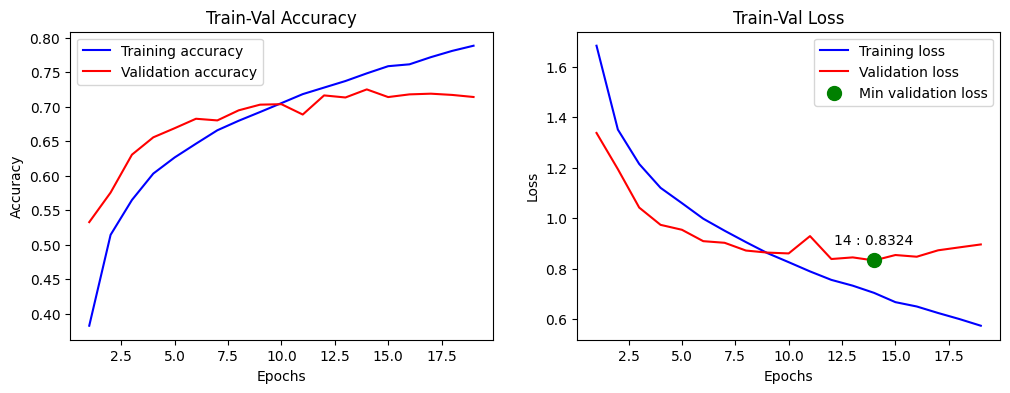

In [63]:
#plotting results
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

min_val_loss = min(val_loss)
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color = "blue", label = "Training accuracy")
plt.plot(epochs, val_accuracy, color = "red", label = "Validation accuracy")
plt.title("Train-Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color = "blue", label = "Training loss")
plt.plot(epochs, val_loss, color = "red", label = "Validation loss")
plt.scatter([min_val_loss_epoch], [min_val_loss],
            color= "green", s = 100, label = "Min validation loss", zorder = 5)
plt.text(min_val_loss_epoch, min_val_loss + 0.05, f"{min_val_loss_epoch} : {min_val_loss:.4f}", ha = "center",
         va = "bottom", fontsize = 10, color = "black")
plt.title("Train-Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [78]:
prediction = model.predict(x_test)
classed_prediction = np.argmax(prediction, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
print(classed_prediction)

[3 8 8 ... 5 4 7]


In [97]:
label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Which picture do you want to test? 
2
Predicted: ship
Actual: ship


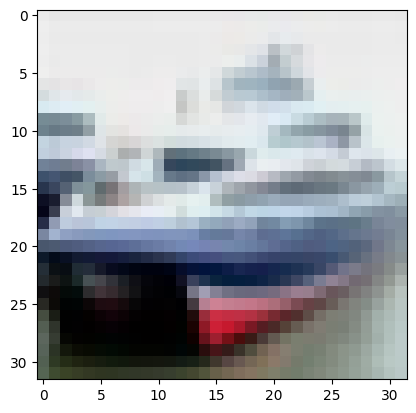

In [98]:
pic_number = input("Which picture do you want to test? \n")

predicted = classed_prediction[int(pic_number) - 1]
actual = y_test[int(pic_number) - 1, 0]

print("Predicted:", label[predicted])
print("Actual:", label[actual])

plt.imshow(x_test[int(pic_number) - 1])
plt.show()